Conectie maken met google drive om de afbeeldingen te kunnen inladen

In [104]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Import libraries

In [105]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import random

In [106]:
base_model = keras.applications.VGG16(
    weights='imagenet', 
    input_shape=(224, 224, 3),
    include_top=False)

base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Zet voorgetrainde laysers vast

In [107]:
base_model.trainable = False

Voeg nieuwe layers toe

In [108]:
inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_5   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


Compile het model

In [109]:
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()])

Create date generator

In [110]:
datagen_train = ImageDataGenerator(
    samplewise_center=True, #Stel elk steekproefgemiddelde in op 0
    rotation_range=10,      #Random rotate
    zoom_range=0.1,         #Random zoom Randomly zoom image
    width_shift_range=0.1,  #Random shift horizontaal
    height_shift_range=0.1, #Random shift verticaal
    horizontal_flip=True,   #Flip random verticaal
    vertical_flip=False,    #Flip niet horizontaal
)

datagen_valid = ImageDataGenerator(samplewise_center=True)

Laad de data in om de het model mee te trainen en te valideren

In [111]:
train_it = datagen_train.flow_from_directory(
    "/content/drive/MyDrive/data/train/", #Locatie in google drive
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="binary",
    batch_size=8,
)

valid_it = datagen_valid.flow_from_directory(
    "/content/drive/MyDrive/data/val/", #Locatie in google drive
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="binary",
    batch_size=8,
)

Found 84 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


Train het model

In [112]:
model.fit(train_it, steps_per_epoch=10, validation_data=valid_it, validation_steps=4, epochs=10)

Epoch 1/10
10/10 [==============================] - 62s 6s/step - loss: 2.5833 - binary_accuracy: 0.4500 - val_loss: 1.4989 - val_binary_accuracy: 0.5926
Epoch 2/10
10/10 [==============================] - 55s 6s/step - loss: 1.5030 - binary_accuracy: 0.6184 - val_loss: 1.4283 - val_binary_accuracy: 0.6667
Epoch 3/10
10/10 [==============================] - 57s 6s/step - loss: 1.0122 - binary_accuracy: 0.6974 - val_loss: 1.0395 - val_binary_accuracy: 0.7778
Epoch 4/10
10/10 [==============================] - 56s 6s/step - loss: 1.1743 - binary_accuracy: 0.6316 - val_loss: 0.8630 - val_binary_accuracy: 0.8148
Epoch 5/10
10/10 [==============================] - 56s 6s/step - loss: 0.6992 - binary_accuracy: 0.7895 - val_loss: 0.7428 - val_binary_accuracy: 0.8148
Epoch 6/10
10/10 [==============================] - 58s 6s/step - loss: 0.4940 - binary_accuracy: 0.7895 - val_loss: 0.6692 - val_binary_accuracy: 0.8148
Epoch 7/10
10/10 [==============================] - 55s 6s/step - loss: 0.54

Verfijn het model met een zeer lage learning_rate

In [113]:
base_model.trainable = True

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),loss=keras.losses.BinaryCrossentropy(from_logits=True),metrics=[keras.metrics.BinaryAccuracy()])

Train het model opnieuw

In [114]:
model.fit(train_it, steps_per_epoch=10, validation_data=valid_it, validation_steps=4, epochs=10)

Epoch 1/10
10/10 [==============================] - 176s 18s/step - loss: 0.7505 - binary_accuracy: 0.8026 - val_loss: 0.3585 - val_binary_accuracy: 0.8519
Epoch 2/10
10/10 [==============================] - 172s 18s/step - loss: 0.1421 - binary_accuracy: 0.9342 - val_loss: 0.2715 - val_binary_accuracy: 0.8889
Epoch 3/10
10/10 [==============================] - 178s 18s/step - loss: 0.0986 - binary_accuracy: 0.9737 - val_loss: 0.3086 - val_binary_accuracy: 0.8519
Epoch 4/10
10/10 [==============================] - 177s 18s/step - loss: 0.0296 - binary_accuracy: 0.9868 - val_loss: 0.3182 - val_binary_accuracy: 0.8148
Epoch 5/10
10/10 [==============================] - 179s 18s/step - loss: 0.0052 - binary_accuracy: 1.0000 - val_loss: 0.3334 - val_binary_accuracy: 0.8148
Epoch 6/10
10/10 [==============================] - 181s 18s/step - loss: 0.0051 - binary_accuracy: 1.0000 - val_loss: 0.3510 - val_binary_accuracy: 0.8148
Epoch 7/10
10/10 [==============================] - 178s 18s/ste

Genereer een random getal, om op die manier een random foto te kiezen

Geef de afbeelding weer

Maak een voorspelling en print de tekst

1/1 [==============================] - 1s 596ms/step
Dit is geen duif


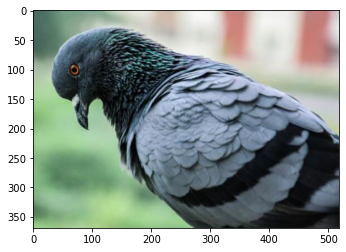

In [136]:
nummer = random.randrange(1,60)
nummer = str(nummer)
afbeeling_locatie = '/content/drive/MyDrive/data/test/' + nummer + '.JPG'

image = mpimg.imread(afbeeling_locatie)
plt.imshow(image)

image = image_utils.load_img(afbeeling_locatie, target_size=(224, 224))
image = image_utils.img_to_array(image)
image = image.reshape(1,224,224,3)
image = preprocess_input(image)
preds = model.predict(image)

if preds[0] < 0:
  print("Dit is een duif")
else:
  print("Dit is geen duif")